In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
df = pd.DataFrame()

In [15]:
df

""


In [16]:
np.random.seed(42)

In [17]:
X = np.random.rand(100, 1)-0.5

In [18]:
X

array([[-0.12545988],
       [ 0.45071431],
       [ 0.23199394],
       [ 0.09865848],
       [-0.34398136],
       [-0.34400548],
       [-0.44191639],
       [ 0.36617615],
       [ 0.10111501],
       [ 0.20807258],
       [-0.47941551],
       [ 0.46990985],
       [ 0.33244264],
       [-0.28766089],
       [-0.31817503],
       [-0.31659549],
       [-0.19575776],
       [ 0.02475643],
       [-0.06805498],
       [-0.20877086],
       [ 0.11185289],
       [-0.36050614],
       [-0.20785535],
       [-0.13363816],
       [-0.04393002],
       [ 0.28517596],
       [-0.30032622],
       [ 0.01423444],
       [ 0.09241457],
       [-0.45354959],
       [ 0.10754485],
       [-0.32947588],
       [-0.43494841],
       [ 0.44888554],
       [ 0.46563203],
       [ 0.30839735],
       [-0.19538623],
       [-0.40232789],
       [ 0.18423303],
       [-0.05984751],
       [-0.37796177],
       [-0.00482309],
       [-0.46561148],
       [ 0.4093204 ],
       [-0.24122002],
       [ 0

In [19]:
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [20]:
y

array([ 5.15728987e-02,  5.94479790e-01,  1.66051606e-01, -7.01779562e-02,
        3.43985933e-01,  3.72874939e-01,  6.59764984e-01,  3.76341398e-01,
       -9.75194335e-03,  1.04794741e-01,  7.35287787e-01,  6.78883363e-01,
        3.05066318e-01,  2.73909733e-01,  3.08559932e-01,  3.49130363e-01,
        7.98606436e-02, -1.45444646e-02, -5.71096619e-03,  5.75800683e-02,
        5.23392240e-02,  4.02946793e-01,  1.29867214e-01,  4.18481141e-02,
       -6.49789982e-02,  2.22943721e-01,  2.53451786e-01, -3.95060058e-02,
        1.75570720e-02,  6.37324227e-01,  1.29006981e-01,  3.34391950e-01,
        5.80417870e-01,  6.00772381e-01,  5.54501010e-01,  2.84001079e-01,
        1.17538848e-01,  6.08765289e-01,  9.22073759e-02,  2.58225391e-02,
        4.26829699e-01, -5.83641153e-02,  7.07523289e-01,  5.40226226e-01,
        2.14112889e-01,  3.37711060e-02,  1.76497872e-01, -6.88843767e-02,
        3.58884053e-02,  4.07472924e-01,  6.12002352e-01,  1.98779325e-01,
        5.84460527e-01,  

In [21]:
df["X"] = X.reshape(100)
df["y"] = y

In [22]:
df.head()

,X,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986


Text(0.5, 1.0, 'X vs y')

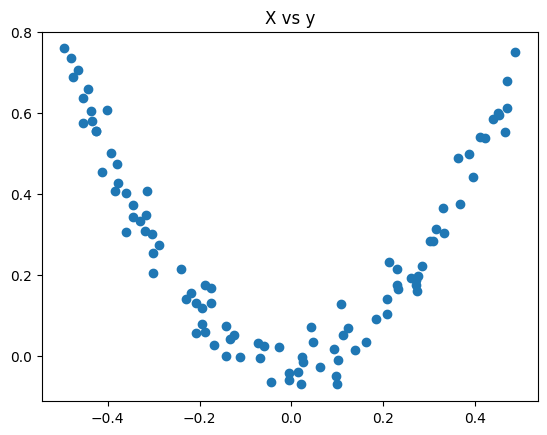

In [23]:
plt.scatter(df["X"], df["y"])
plt.title("X vs y")

In [27]:
# base model is average
df["pred1[base_model]"]=df["y"].mean()

In [28]:
df.head()

,X,y,pred1[base_model]
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458


In [30]:
# residual 1 = actual - base model
df["res1"] = df["y"] - df["pred1[base_model]"]

In [31]:
df.head()

,X,y,pred1[base_model],res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


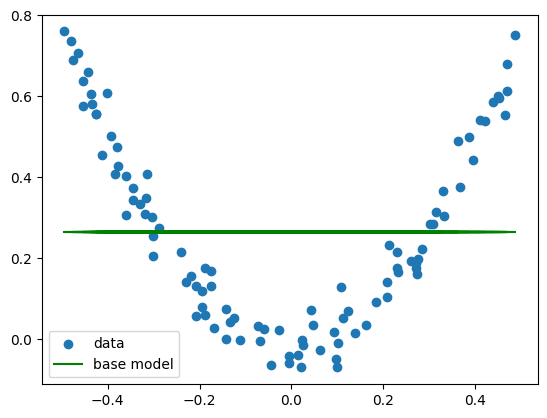

In [35]:
plt.scatter(df["X"], df["y"], label="data")
plt.plot(df["X"], df["pred1[base_model]"], color='g', label="base model")
plt.legend()

### I am going to train my 1st decision tree model on top of residual

In [44]:
# X, res1

X = df["X"].values.reshape(100, 1)

In [45]:
y = df["res1"]

In [46]:
from sklearn.tree import DecisionTreeRegressor
DT1 = DecisionTreeRegressor(max_leaf_nodes=8)
DT1.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=8)

In [47]:
from sklearn.tree import plot_tree

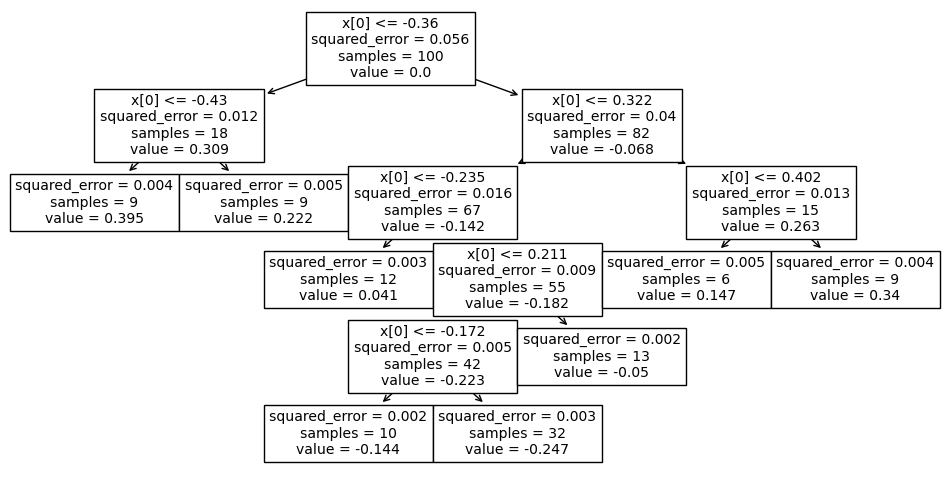

In [51]:
plt.figure(figsize=(12, 6))
plot_tree(DT1)
plt.show()

In [53]:
df["pred2"] = DT1.predict(X)

In [54]:
df

,X,y,pred1[base_model],res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139
1,0.450714,0.594480,0.265458,0.329021,0.340426
2,0.231994,0.166052,0.265458,-0.099407,-0.049674
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139
4,-0.343981,0.343986,0.265458,0.078528,0.040506
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139
98,-0.474581,0.689516,0.265458,0.424057,0.395454


`loss = actual - (base model + alpha * pred2)`

```python
alpha = learning rate

pred2 = DT1.predict(X)

res2 = loss
```

In [55]:
BASE = df["pred1[base_model]"]

In [56]:
learning_rate = 0.1

In [58]:
df["res2"] = df["y"] - (BASE + (learning_rate * df["pred2"]))

In [59]:
df

,X,y,pred1[base_model],res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,-0.247139,-0.189172
1,0.450714,0.594480,0.265458,0.329021,0.340426,0.294979
2,0.231994,0.166052,0.265458,-0.099407,-0.049674,-0.094439
3,0.098658,-0.070178,0.265458,-0.335636,-0.247139,-0.310922
4,-0.343981,0.343986,0.265458,0.078528,0.040506,0.074477
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,-0.247139,-0.281420
96,0.022733,-0.002305,0.265458,-0.267763,-0.247139,-0.243049
97,-0.072459,0.032809,0.265458,-0.232650,-0.247139,-0.207936
98,-0.474581,0.689516,0.265458,0.424057,0.395454,0.384512


In [64]:
X = df["X"].values.reshape(100, 1)
y = df["res2"]

In [65]:
DT2 = DecisionTreeRegressor(max_leaf_nodes=8)
DT2.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=8)

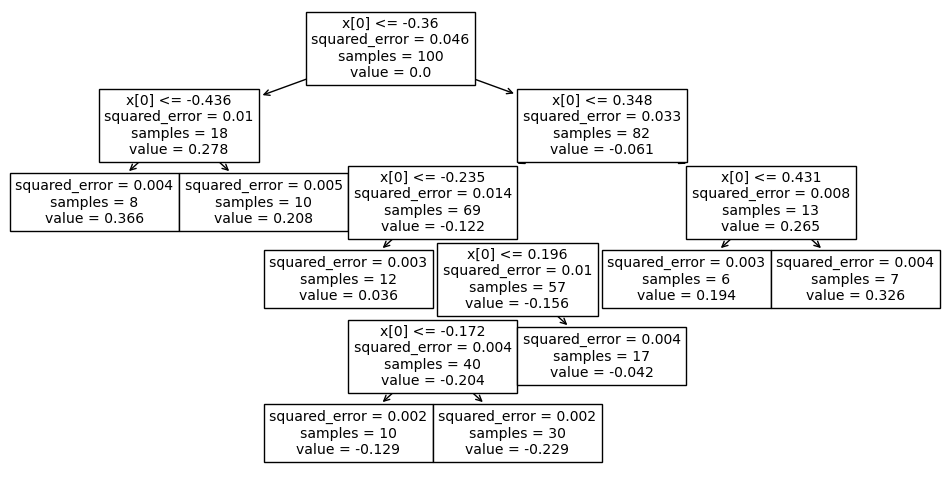

In [66]:
plt.figure(figsize=(12, 6))
plot_tree(DT2)
plt.show()

`final_pred = BASE + alpha * DT1 + alpha * DT2`

`final_pred = BASE + alpha * res1 + alpha * res2`

In [67]:
query = [[0.4501431]]

In [68]:
pred1 = DT1.predict(query)

In [74]:
pred1

array([0.34042552])

In [69]:
pred2 = DT2.predict(query)

In [75]:
pred2

array([0.32555151])

In [71]:
alpha = learning_rate
alpha

0.1

In [73]:
BASE[0] # base model

0.26545839669679816

In [76]:
final_pred = BASE[0] + (alpha*(pred1)) + (alpha*(pred2))

In [77]:
final_pred

array([0.3320561])